In [0]:
import os
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc, mean_squared_error, log_loss

In [0]:
'''Model Functions'''

def Naive_Bayes(features, target):
    '''Function to Train Naive Bayes Classifier'''
    gnb = GaussianNB()
    gnb.fit(features, target)
    return gnb

def Decision_Tree(features, target):
    '''Function to Train Decision Tree Classifier'''
    dt = DecisionTreeClassifier()
    dt.fit(features, target)
    return dt

def Random_Forest(features, target):
    '''Function to Random Forest Classifier'''
    rf = RandomForestClassifier()
    rf.fit(features,target)
    return rf

def Knn(features, target):
    '''Function to Knn Classifier'''
    knn = KNeighborsClassifier()
    knn.fit(features, target)
    return knn

def SVM(features, target):
    '''Function to SVM Classifier'''
    svm = LinearSVC()
    svm.fit(features, target)
    return svm

def Logistic_Reg(features, target):
    '''Function to SVM Classifier'''
    lr = LogisticRegression()
    lr.fit(features, target)
    return lr

In [0]:

'''Evaluation Functions'''
def con_matrix(test_actual, test_predictions,model_name):
    labels=['1','0']
    #cm = confusion_matrix(test_actual, test_predictions, labels)
    cm = confusion_matrix(test_actual, test_predictions,labels = [1,0])
    confusion_mat = pd.DataFrame(data=cm[0:,0:],    # values
                                 index=labels,    # 1st column as index
                                 columns=labels)  # 1st row as the column names
    print('The Confusion Matrix of the',model_name,'\n',confusion_mat)


def score_calc(model_object, test_features, test_actual, test_predictions, model_name):
    Accuracy = metrics.accuracy_score(test_actual,test_predictions)
    recall_list = []
    #recall = metrics.recall_score(test_actual,test_predictions,pos_label ='Good Return').tolist()
    #precision = metrics.precision_score(test_actual,test_predictions,pos_label ='Good Return').tolist()
    #f1 = metrics.f1_score(test_actual,test_predictions,pos_label ='Good Return').tolist()
    recall = metrics.recall_score(test_actual,test_predictions).tolist()
    precision = metrics.precision_score(test_actual,test_predictions).tolist()
    f1 = metrics.f1_score(test_actual,test_predictions).tolist()
    test_pred_probability = model_object.predict_proba(test_features)
    auc = roc_auc_score(test_actual, test_pred_probability[:,1])
    
    recall_list.append(recall)
    mod_result = pd.DataFrame(recall_list,columns=['Recall'])
    mod_result['Precision'] = precision
    mod_result['F1'] = f1
    mod_result['Accuracy'] = Accuracy
    mod_result['AUC'] = auc
    mod_result['Model_Type'] = model_name
    
    return mod_result

In [0]:

def print_model_stats(model_object, xtrain, ytrain, xtest, ytest):
    '''
        Objective: To print required model statistics 
        Arguments: 6 arguments
                    1) Model Object
                    2) training dataset for features
                    3) training dataset for target
                    4) testing dataset for features
                    5) testing dataset for target
                    6) name of the target variable
           
        Output   : All key model statistics like AUC, Lift chart etc.

    '''

    prob_y2 = model_object.predict_proba(xtest)

    print ("--------------------------------------------------------------------")

    print( "Model Statistics on Validation dataset")

    print ("Log Loss Without for validation sample:", \
                    log_loss(ytest, prob_y2[:,1],eps=1e-15, normalize=True))

    print ("ROC-AUC score for the validation sample: %.3f" \
                                      % roc_auc_score(ytest, prob_y2[:,1]))

    
    print ("ROC curve for the Validaton Sample")
    plot_roc(ytest.values.ravel(), prob_y2[:,1])
    plt.gcf().clear()

In [0]:

def plot_roc(ytest,yprob):
        '''
        Objective: Function to plot ROC Graph
        Argument : ytest: Actual Take up rate(1/0), yprob: predcicted probabilities
        Returns  : ROC Plot
        Output   : ROC Plot

        '''
        fig = plt.figure(1, figsize=(6, 6))

        false_positive_rate, true_positive_rate, thresholds = \
        roc_curve(ytest, yprob)

        roc_auc = auc(false_positive_rate, true_positive_rate)

        plt.title("Receiving Operator Characteristic")

        plt.plot(false_positive_rate, true_positive_rate, 'b', \
        label='AUC = %0.2f' % roc_auc)

        plt.legend(loc='lower right')
        plt.plot([0,1], [0,1], 'r--')
        plt.xlim([-0.1, 1.2])
        plt.ylim([-0.1, 1.2])
        plt.ylabel("True Positive Rate")
        plt.xlabel("False Positive Rate")
        plt.tight_layout()

        nfig = plt.figure(2, figsize=(6, 6))
        return plt.show()

In [0]:
loan_application = pd.read_csv("/dbfs/mnt/agorizeblob/loan_data/application_data.csv")
 
loan_application.tail()

Out[8]:

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,...,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,...,0.0855,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,...,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,NaN,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,...,NaN,0.0805,NaN,0.0000,NaN,block of flats,0.0718,Panel,No,0.0,0.0,0.0,0.0,-787.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [0]:
markers = ['SK_ID_CURR']
target = ['TARGET']

In [0]:
modeldata = loan_application.copy()

In [0]:
#Removing Missing Values
modeldata = modeldata.dropna(how='any')

In [0]:
#Removing the markers and target
X = modeldata.drop(markers+target,axis=1)
y = modeldata[target]
X_with_dummy_features = pd.get_dummies(X,drop_first=True)
y_with_dummy_features = pd.get_dummies(y,drop_first=True)
# Create training and testing sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X_with_dummy_features, y_with_dummy_features, 
                                                    test_size=0.1, random_state=2018)

The Confusion Matrix of the Decision Tree 
 1 0
1 15 27
0 58 761
--------------------------------------------------------------------
Model Statistics on Validation dataset
Log Loss Without for validation sample: 3.4098053080352613
ROC-AUC score for the validation sample: 0.643
ROC curve for the Validaton Sample

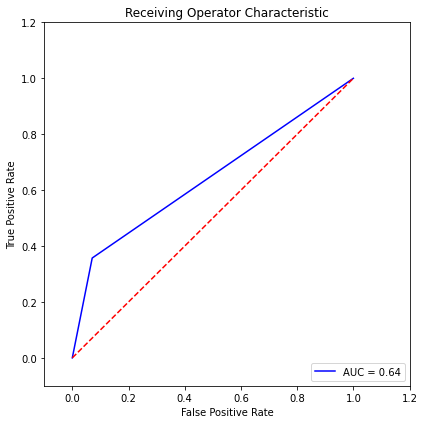

In [0]:
#Calling Decision Tree Model
dt = Decision_Tree(x_train, y_train.values.ravel())
pred_DT = dt.predict(x_test)
con_matrix(y_test, pred_DT,"Decision Tree")
#feat_imp_dt_rf(x_train,dt)
results_DT=score_calc(dt, x_test, y_test, pred_DT,"Decision Tree")
print_model_stats(dt, x_train, y_train, x_test, y_test)

In [0]:
temp = dt.predict_proba(x_test)

In [0]:
dt.predict_proba(x_test)

Out[43]: array([1., 0.])

In [0]:
result_df = pd.DataFrame()

In [0]:
pred_DT

Out[18]: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0])

In [0]:
x_test

Out[17]:

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
293352,0,405000.0,1546020.0,42642.0,1350000.0,0.010006,-15328,-1478,-1075.0,-2431,6.0,1,1,0,1,1,0,2.0,2,1,6,0,0,0,0,0,0,0.726008,0.748278,0.565608,0.1794,0.2518,0.9871,0.8232,0.0439,0.00,0.4138,0.1667,0.2083,0.0459,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
170839,1,225000.0,993082.5,42075.0,913500.0,0.003813,-12222,-1309,-3268.0,-3653,14.0,1,1,0,1,0,0,3.0,2,2,14,0,0,0,0,0,0,0.400431,0.487026,0.477649,0.0619,0.0634,0.9801,0.7280,0.1068,0.00,0.1379,0.1667,0.0417,0.0418,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
303511,0,360000.0,918000.0,26838.0,918000.0,0.010006,-19840,-1213,-1538.0,-3360,0.0,1,1,1,1,1,0,1.0,2,2,8,0,0,0,0,0,0,0.737188,0.667433,0.384207,0.0440,0.0242,0.9831,0.7552,0.0000,0.00,0.0803,0.1667,0.2083,0.0147,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
299720,0,225000.0,292500.0,15061.5,292500.0,0.022800,-15134,-3021,-120.0,-1976,7.0,1,1,1,1,1,0,1.0,2,2,13,0,1,1,0,1,1,0.327688,0.646379,0.565608,0.0784,0.0655,0.9771,0.6872,0.0087,0.00,0.1379,0.1667,0.2083,0.0249,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
175546,0,234000.0,654498.0,43915.5,585000.0,0.016612,-21635,-4211,-6621.0,-2256,3.0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.804478,0.567395,0.816092,0.0825,0.0608,0.9752,0.6600,0.0267,0.00,0.1379,0.1667,0.2083,0.0487,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103978,0,315000.0,1125000.0,47794.5,1125000.0,0.028663,-22357,-14263,-8036.0,-4147,8.0,1,1,0,1,1,0,2.0,2,2,15,0,0,0,0,0,0,0.532519,0.611283,0.633032,0.2227,0.1035,0.9891,0.8504,0.0307,0.12,0.1034,0.3333,0.3750,0.0910,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,